seabornが好きだ。

特に指定しなくても

多数のグラフを別々に作った場合に、色を合わせたい場合がある。  
例えば「1月のデータは赤、2月は青」という決まりでグラフを書きたい場合である。
一部のグラフでその決まりが崩れていると、読んで理解するのに時間がかかってしまうだろう。

今回は、swarmplotで色を直接指定する方法について調べた。

In [1]:
import seaborn as sns
import matplotlib

Duplicate key in file PosixPath('/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : Hiragino sans')


In [2]:
# 動作環境の確認
# print(pd.__version__)
# print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)
!python3 --version

0.11.0
3.3.1
Python 3.8.5


In [3]:
# https://seaborn.pydata.org/generated/seaborn.swarmplot.html
# ★styleの設定どうする?

tips = sns.load_dataset("tips")
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object



seabornのswarmplotで色を指定する方法は2つある。
1つが
もう1つが。

## 1つ目：片方の軸のカテゴリに合わせて色を指定したい

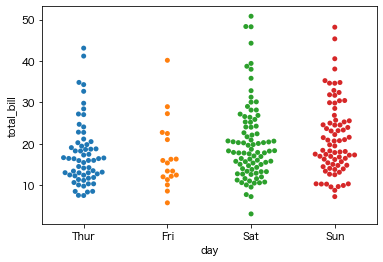

In [4]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

この色を直接指定したい。  
Thurを赤で、Friを黒で、……みたいな具体的な色があった場合、どうすればよいのか?  


色を単純に入れ替えたいだけならば、hue_orderで順序を指定すれば良い。以下のようになる。  
（たぶん元データの中でdayのデータ型がcategoryなので、hue_orderを指定しても無視されて、categoryが優先される?）

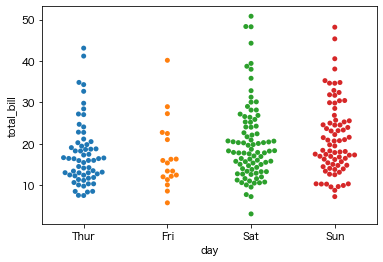

In [5]:
ax = sns.swarmplot(x="day", y="total_bill", hue_order=["Fri", "Sun", "Sat", "Thur"], data=tips)

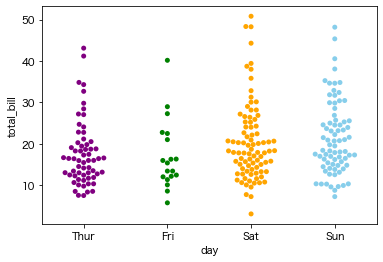

In [6]:
ax = sns.swarmplot(x="day", y="total_bill", palette=["purple", "green", "orange", "skyblue"], data=tips)

リストだと、どの値がどの色になるのか分かりづらい。dictも指定できて、この場合は対応関係が明確になる。

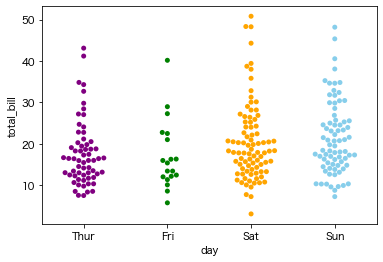

In [7]:
ax = sns.swarmplot(x="day", y="total_bill", palette={"Thur": "purple", "Fri": "green", "Sat": "orange", "Sun": "skyblue"}, data=tips)

ちなみにpaletteをリストで指定し、長さが足りない場合、繰り返しになる

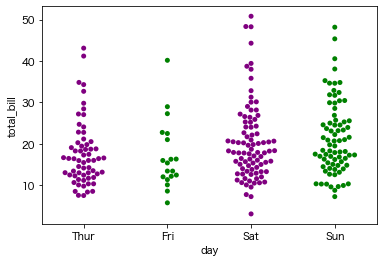

In [8]:
ax = sns.swarmplot(x="day", y="total_bill", palette=["purple", "green"], data=tips)

辞書でkeyがない場合は、エラーになる。そのdayを何色で塗ればいいか分からないからね。

In [9]:
# 辞書のkeyにFriがないのでエラー 
ax = sns.swarmplot(x="day", y="total_bill", palette={"Thur": "purple", "Sat": "orange", "Sun": "skyblue"}, data=tips)

KeyError: 'Fri'

## 2つ目：

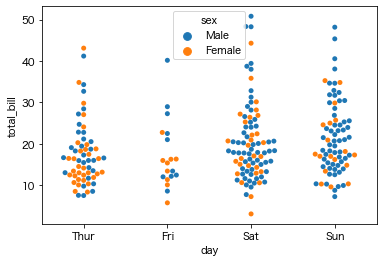

In [10]:
# Color the points using a second categorical variable:
# 2つ目のカテゴリカル変数を用いて、点の色を指定する

ax = sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

xにdayというカテゴリカル変数を指定して、色のパラメータhueにはsexという別のカテゴリカル変数を指定するパターン。

色を単純に入れ替えたいだけならば、hue_orderで順序を指定すれば良い。以下のようになる。

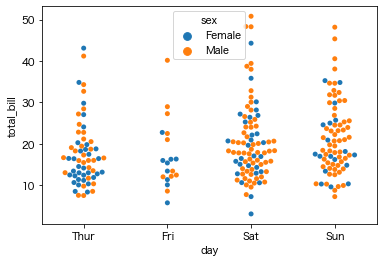

In [11]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, hue_order=["Female", "Male"])

次に、「男性が緑、女性が紫」のように、直接色を指定したい場合はどうすればよいだろうか?

palette変数だよなー多分。  
**palette** palette name, list, or dict  
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by [color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette), or a dictionary mapping hue levels to matplotlib colors.


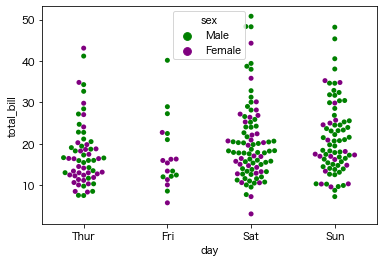

In [12]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", palette=["green", "purple"], data=tips)

リストだと、どの値がどの色になるのか分かりづらい。dictも指定できて、この場合は対応関係が明確になる。

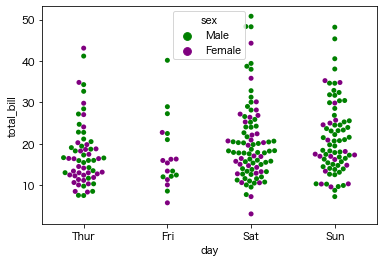

In [13]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", palette={"Male": "green", "Female": "purple"}, data=tips)

In [14]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.to_hex.html
    
print(matplotlib.colors.to_hex("green"))
print(matplotlib.colors.to_hex("purple"))


#008000
#800080


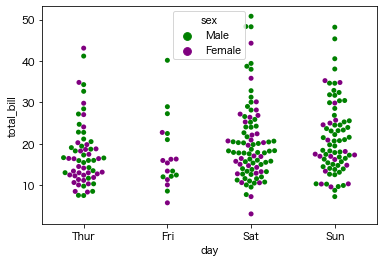

In [15]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", palette={"Male": "#008000", "Female": "#800080"}, data=tips)

## 余談：color変数の挙動

**color** matplotlib color, optional  
Color for all of the elements, or seed for a gradient palette.

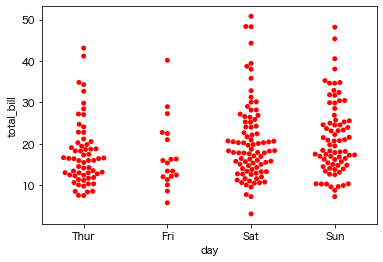

In [16]:
ax = sns.swarmplot(x="day", y="total_bill", color="red",  data=tips)

なぜかFemaleの色だけを赤に指定するっぽい?

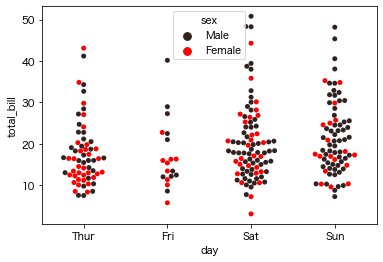

In [17]:
# Color the points using a second categorical variable:
# 2つ目のカテゴリカル変数を用いて、点の色を指定する

ax = sns.swarmplot(x="day", y="total_bill", hue="sex", color="red", data=tips)

ではcolorとして色の配列を渡せば良さそうに見えるが、それではエラーになる。

In [18]:
# Color the points using a second categorical variable:
# 2つ目のカテゴリカル変数を用いて、点の色を指定する

ax = sns.swarmplot(x="day", y="total_bill", hue="sex", color=["red", "gray"],  data=tips)

ValueError: RGBA sequence should have length 3 or 4